In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('c:/dataset/aqi.csv')


In [3]:
data.head()

,datetime,aqi
0,2017-11-01 00:00:00,482.0
1,2017-11-01 01:00:00,482.0
2,2017-11-01 02:00:00,482.0
3,2017-11-01 03:00:00,482.0
4,2017-11-01 04:00:00,482.0


In [17]:
data.describe()

,aqi
count,24609.000000
mean,248.679938
std,115.889242
min,37.000000
25%,157.000000
50%,231.000000
75%,342.281704
max,500.500000


In [19]:
data.dtypes

datetime     object
aqi         float64
dtype: object

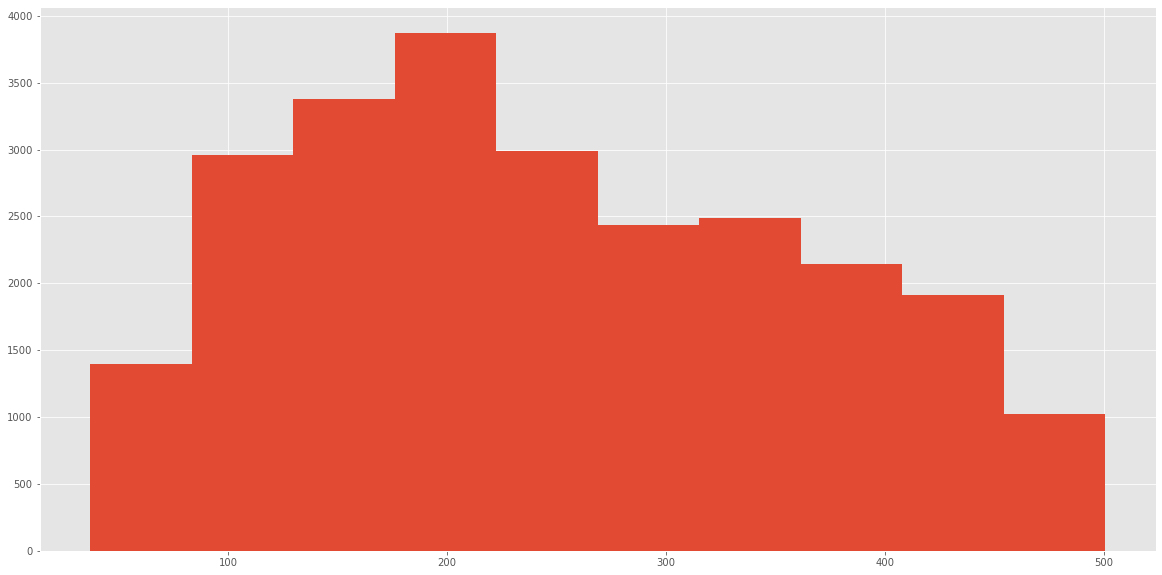

In [5]:
data['aqi'].hist()

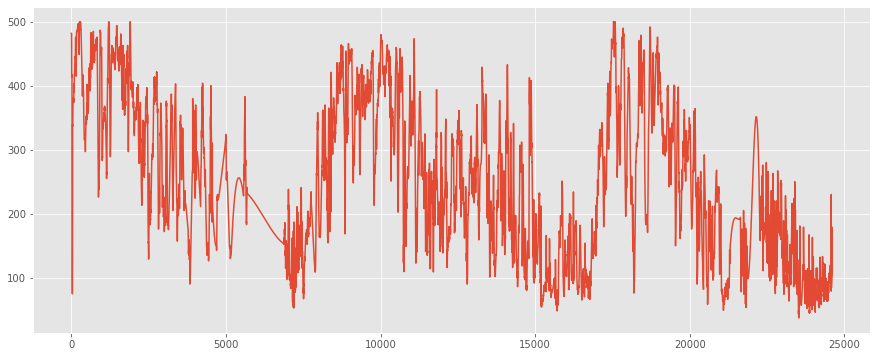

In [6]:
data["aqi"].plot(figsize=(15, 6))
plt.show()

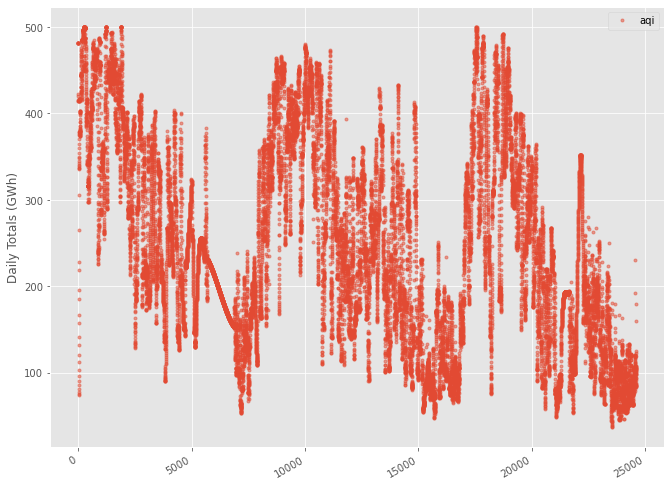

In [7]:
cols_plot = ['aqi']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

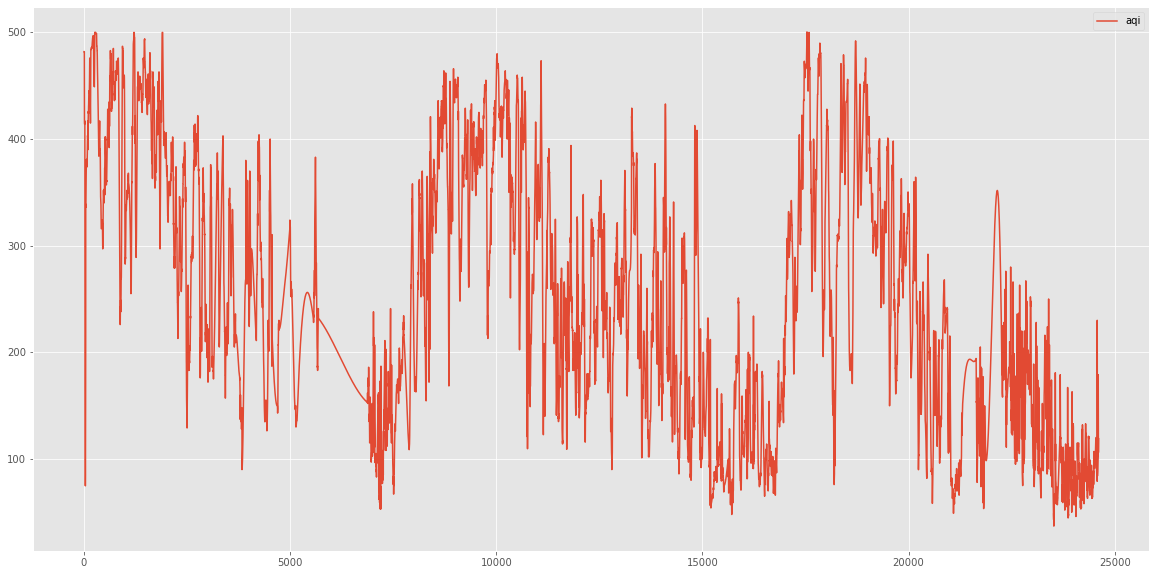

In [8]:
data.plot(grid='true')

In [9]:
one, two, three = np.split(
        data['aqi'].sample(
        frac=1), [int(.25*len(data['aqi'])),
        int(.75*len(data['aqi']))])

In [10]:
mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

249.2352713343489 248.61469693530714 248.2551551691841
13371.552936857637 13446.056744292413 13461.461006171563


In [20]:
#Dickey-Fuller Test for Stationarity
#checking the data seasonality
from statsmodels.tsa.stattools import adfuller
X = data["aqi"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.853240
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [15]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['aqi'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))

ADF = -6.853239893212219
p-value = 1.6734171056599502e-09
